In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

,Price,log_ret
Date,,
2017-09-15,157500,0.025725
2017-09-22,157500,0.000000
2017-09-29,157500,0.000000
2017-10-13,163500,0.037388
2017-10-20,167500,0.024170
...,...,...
2023-04-21,178500,-0.078102
2023-04-28,179000,0.002797
2023-05-05,180500,0.008345


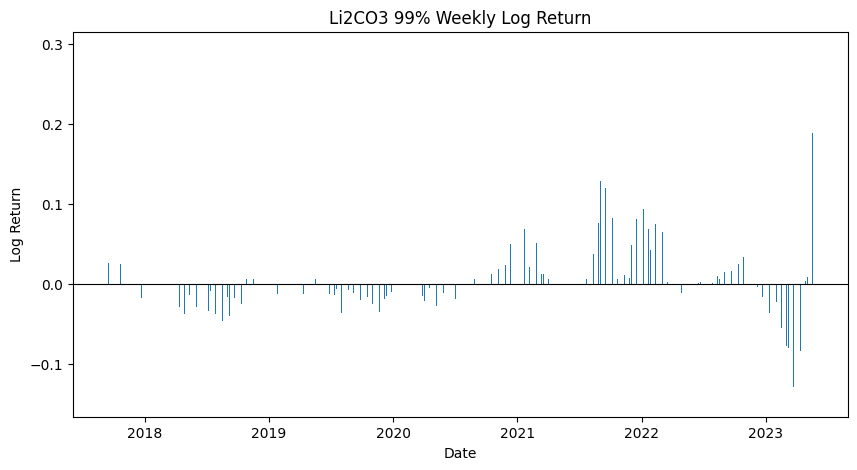

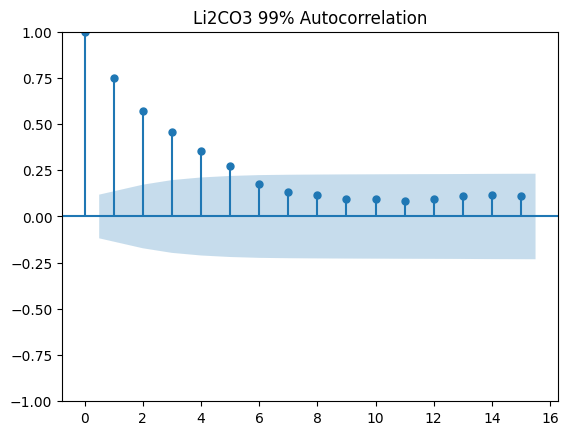

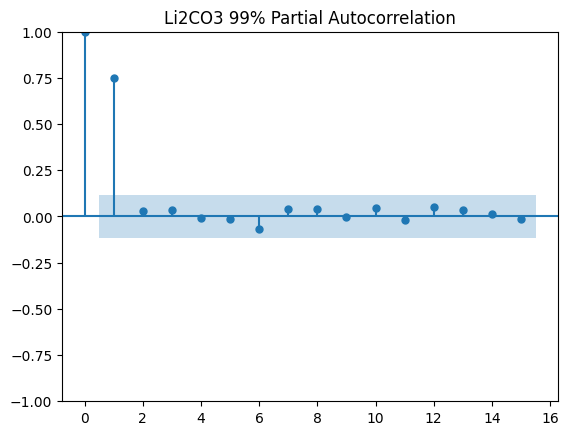

In [12]:
# Li2CO3 99% weekly
li2co3 = pd.read_csv('./Data/Lithium Carbonate (wind database).csv')
li2co3.set_index('Date', inplace = True)
li2co3.rename(columns = {'Li2CO3 99%': 'Price'}, inplace = True)

li2co3.index = pd.to_datetime(li2co3.index)
li2co3.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
li2co3 = li2co3[li2co3.index.dayofweek == 4] # Friday
li2co3 = li2co3[li2co3.index.isin(pd.date_range('2017-09-08', '2023-05-22'))] # Date range

li2co3['log_ret'] = np.log(li2co3.Price).diff() # Weekly log return
li2co3 = li2co3.tail(-1) # Delete first row (log_ret = NaN)

# li2co3.to_csv('Li2CO3_wind.csv')
display(li2co3)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(li2co3.index, li2co3.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Li2CO3 99% Weekly Log Return')
plt.show()

acf = plot_acf(li2co3['log_ret'], lags=15, alpha=0.05, title='Li2CO3 99% Autocorrelation')
pacf = plot_pacf(li2co3['log_ret'], lags=15, alpha=0.05, method='ywm', title='Li2CO3 99% Partial Autocorrelation')

,Price,log_ret
Date,,
2017-09-15,140500,0.021584
2017-09-22,142500,0.014135
2017-09-29,142500,0.000000
2017-10-13,142500,0.000000
2017-10-20,146500,0.027683
...,...,...
2023-04-21,205000,-0.202443
2023-04-28,187500,-0.089231
2023-05-05,187500,0.000000


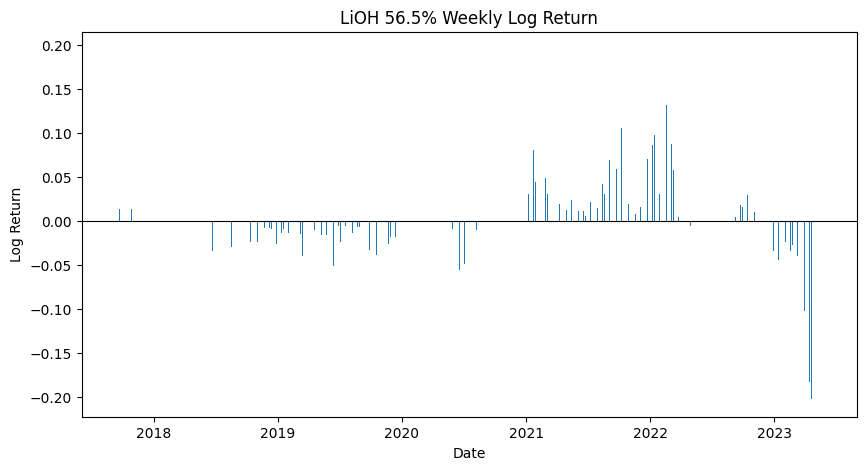

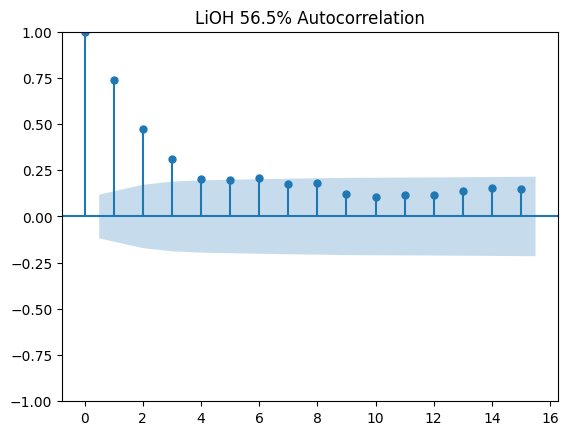

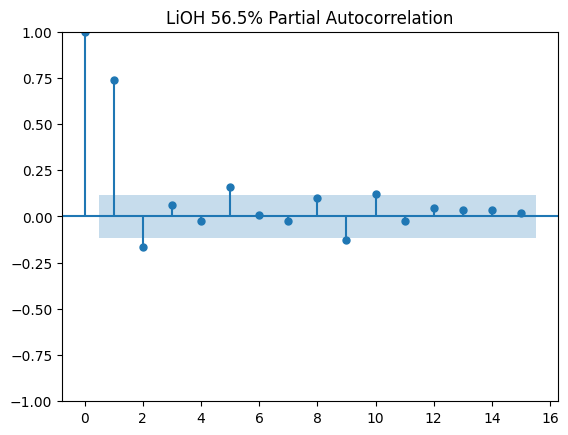

In [13]:
# LiOH 56.5% weekly
lioh = pd.read_csv('./Data/Lithium Hydroxide (wind database).csv')
lioh.set_index('Date', inplace = True)
lioh.rename(columns = {'LiOH 56.5%': 'Price'}, inplace = True)

lioh.index = pd.to_datetime(lioh.index)
lioh.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value i.e. Fri missing use Thu
lioh = lioh[lioh.index.dayofweek == 4] # Friday
lioh = lioh[lioh.index.isin(pd.date_range('2017-09-08', '2023-05-22'))] # Date range

lioh['log_ret'] = np.log(lioh.Price).diff() # Weekly log return
lioh = lioh.tail(-1) # Delete first row (log_ret = NaN)

# lioh.to_csv('LiOH_wind.csv')
display(lioh)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(lioh.index, lioh.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('LiOH 56.5% Weekly Log Return')
plt.show()

acf = plot_acf(lioh['log_ret'], lags=15, alpha=0.05, title='LiOH 56.5% Autocorrelation')
pacf = plot_pacf(lioh['log_ret'], lags=15, alpha=0.05, method='ywm', title='LiOH 56.5% Partial Autocorrelation')

LC:COM - Lithium Futures:
- File: Historical Prices (9).xlsx
- Source: Seeking Alpha
- URL:
- Currency: USD
- Available times: 

,Price,log_ret
Date,,
2017-09-15,140500,0.021584
2017-09-22,142500,0.014135
2017-09-29,142500,0.000000
2017-10-13,142500,0.000000
2017-10-20,146500,0.027683
...,...,...
2023-04-21,205000,-0.202443
2023-04-28,187500,-0.089231
2023-05-05,187500,0.000000


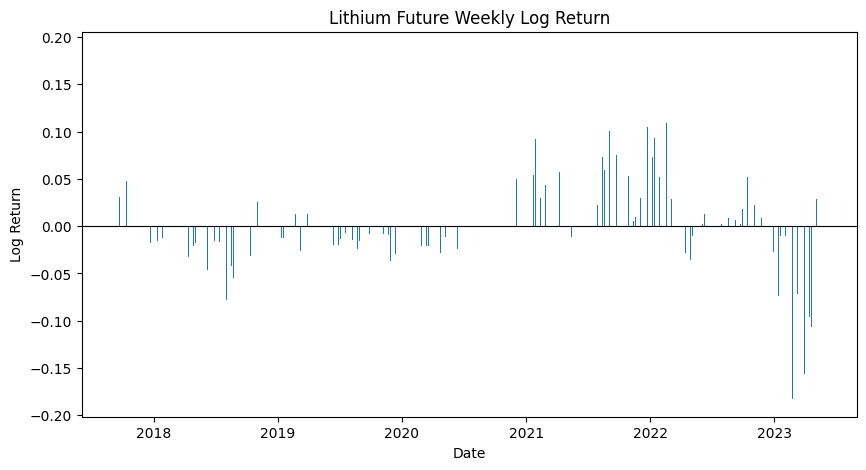

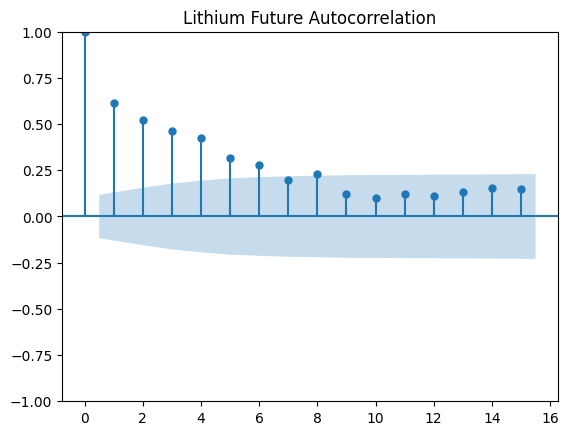

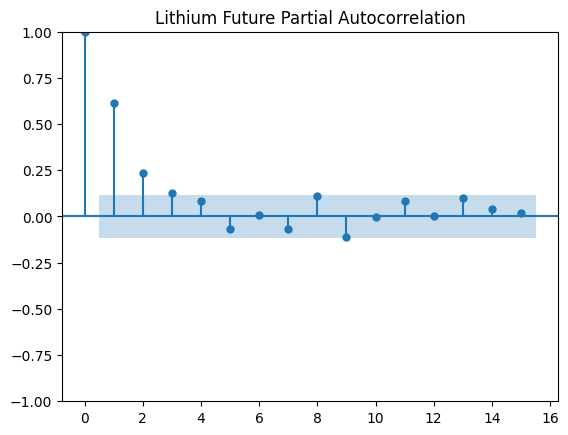

In [14]:
# Lithium Future Seeking Alpha
def str_to_num(s):
    s = str(s).replace(',','')
    if 'M' in s:
        return float(s.replace('M','')) * 1e6
    if 'K' in s:
        return float(s.replace('K','')) * 1e3
    return float(s)

li_future = pd.read_excel('./Data/Historical Prices (9).xlsx', usecols=[0,4])
li_future['Date'] = li_future['Date'].str.replace(',','')
li_future['Date'] = li_future['Date'].str.replace('.','')
li_future.set_index('Date', inplace =True)
li_future.rename(columns = {'Close': 'Price'}, inplace = True)
li_future.index = pd.to_datetime(li_future.index, format = '%b %d %Y')
li_future = li_future.sort_index()
li_future['Price'] = li_future['Price'].apply(str_to_num)
li_future.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value i.e. Fri missing use Thu
li_future = li_future[li_future.index.dayofweek == 4]
li_future = li_future[li_future.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

li_future['log_ret'] = np.log(li_future.Price).diff() # Weekly log return
li_future = li_future.tail(-1) # Delete first row (log_ret = NaN)


# li_future.to_csv('li_future.csv')
display(lioh)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(li_future.index, li_future.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Lithium Future Weekly Log Return')
plt.show()

acf = plot_acf(li_future['log_ret'], lags=15, alpha=0.05, title='Lithium Future Autocorrelation')
pacf = plot_pacf(li_future['log_ret'], lags=15, alpha=0.05, method='ywm', title='Lithium Future Partial Autocorrelation')


Lithium Carbonate (Li2CO3) 99% Min China Spot:
- File: 99C-LTCB.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data
- Currency: CNY
- Available times: since 2009-05-01

,Price
Date,
2017-09-08,144000.0
2017-09-15,146000.0
2017-09-22,146000.0
2017-09-29,146000.0
2017-10-13,152000.0
...,...
2023-04-21,157500.0
2023-04-28,161500.0
2023-05-05,165500.0


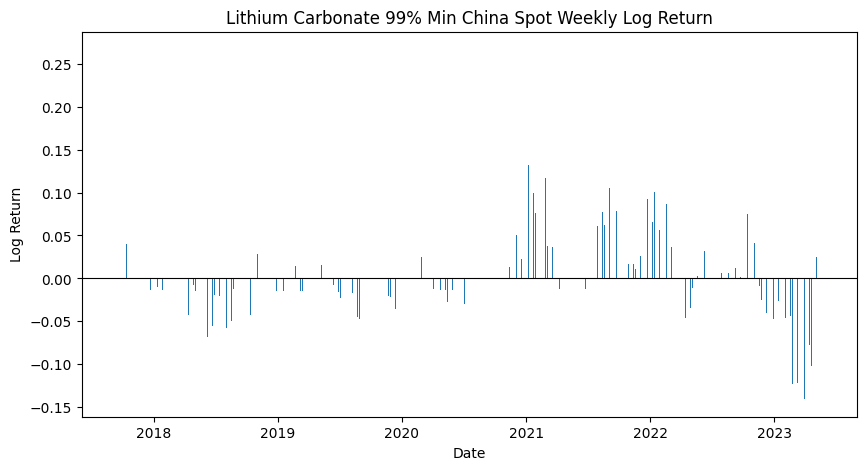

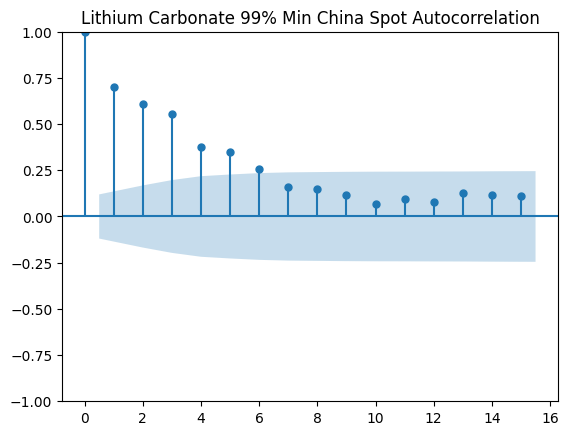

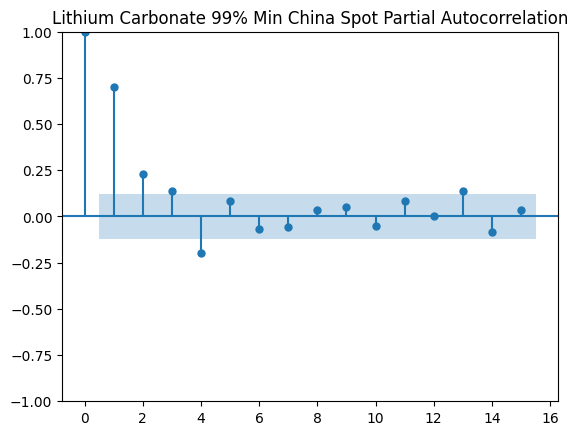

In [15]:
# Lithium Carbonate 99% Min China Spot

ltcb99 = pd.read_csv('./Data/99C-LTCB.csv', usecols=[0,1])
ltcb99.set_index('Date', inplace = True)
ltcb99.rename(columns = {'Close': 'Price'}, inplace = True)
ltcb99.index = pd.to_datetime(ltcb99.index)
ltcb99 = ltcb99.sort_index()
ltcb99['Price'] = ltcb99['Price'].apply(str_to_num)
ltcb99.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
ltcb99 = ltcb99[ltcb99.index.dayofweek == 4] # Friday
ltcb99 = ltcb99[ltcb99.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# ltcb99.to_csv('ltcb99.csv')
display(ltcb99)

ltcb99['log_ret'] = np.log(ltcb99.Price).diff() # Weekly log return
ltcb99 = ltcb99.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(ltcb99.index, ltcb99.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Lithium Carbonate 99% Min China Spot Weekly Log Return')
plt.show()

acf = plot_acf(ltcb99['log_ret'], lags=15, alpha=0.05, title='Lithium Carbonate 99% Min China Spot Autocorrelation')
pacf = plot_pacf(ltcb99['log_ret'], lags=15, alpha=0.05, method='ywm', title='Lithium Carbonate 99% Min China Spot Partial Autocorrelation')


Lithium Carbonate (Li2CO3) 99.5% Min China Spot:
- File: 995C-LTCB.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-carbonate-99.5-min-china-futures-historical-data
- Currency: CNY
- Available times: sincd 2011-06-01

,Price
Date,
2017-09-08,156000.0
2017-09-15,158000.0
2017-09-22,163000.0
2017-09-29,163000.0
2017-10-13,171000.0
...,...
2023-04-21,172500.0
2023-04-28,177500.0
2023-05-05,182500.0


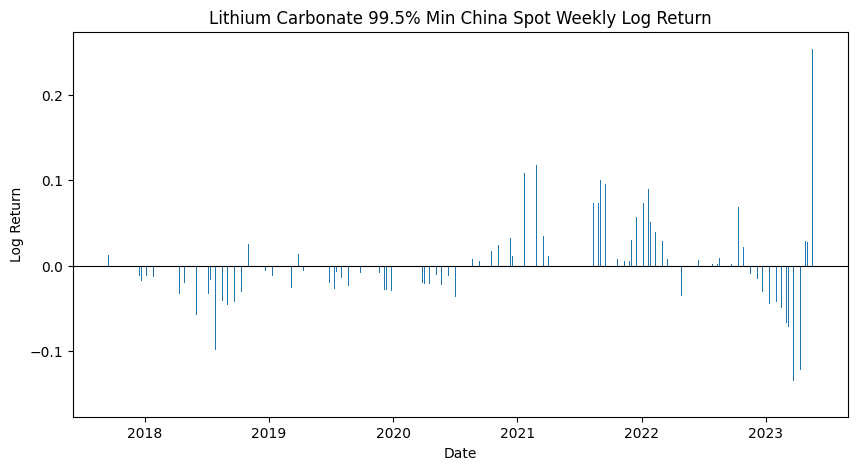

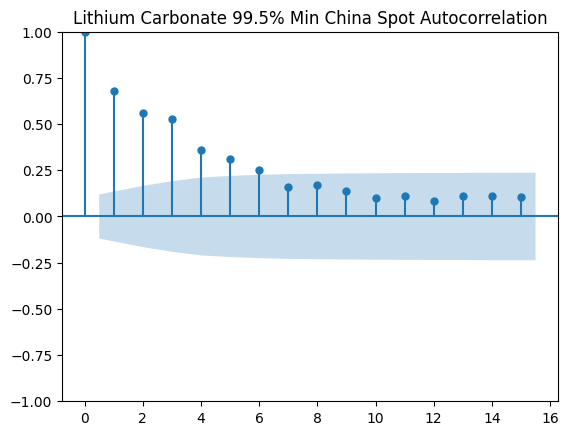

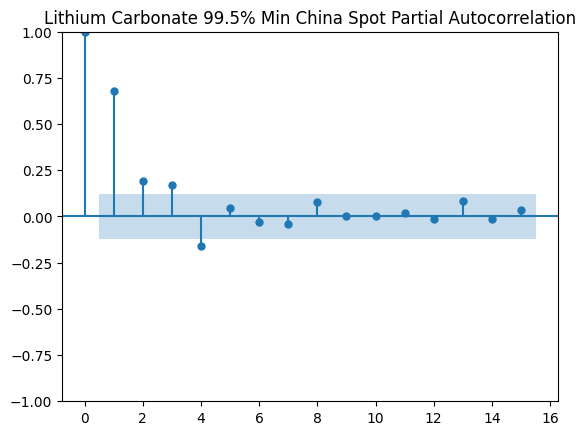

In [16]:
# Lithium Carbonate 99.5% Min China Spot

ltcb995 = pd.read_csv('./Data/995C-LTCB.csv', usecols=[0,1])
ltcb995.set_index('Date', inplace = True)
ltcb995.rename(columns = {'Close': 'Price'}, inplace = True)
ltcb995.index = pd.to_datetime(ltcb995.index)
ltcb995 = ltcb995.sort_index()
ltcb995['Price'] = ltcb995['Price'].apply(str_to_num)
ltcb995.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
ltcb995 = ltcb995[ltcb995.index.dayofweek == 4] # Friday
ltcb995 = ltcb995[ltcb995.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# ltcb995.to_csv('ltcb995.csv')
display(ltcb995)

ltcb995['log_ret'] = np.log(ltcb995.Price).diff() # Weekly log return
ltcb995 = ltcb995.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(ltcb995.index, ltcb995.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Lithium Carbonate 99.5% Min China Spot Weekly Log Return')
plt.show()

acf = plot_acf(ltcb995['log_ret'], lags=15, alpha=0.05, title='Lithium Carbonate 99.5% Min China Spot Autocorrelation')
pacf = plot_pacf(ltcb995['log_ret'], lags=15, alpha=0.05, method='ywm', title='Lithium Carbonate 99.5% Min China Spot Partial Autocorrelation')

Lithium Cobalt Oxide (LiCoO2) 60% Min China Spot:
- File: 60C-LTCX.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-cobalt-oxide-60-min-china-futures-historical-data
- Currency: CNY
- Available times: from 2010-04-01


,Price
Date,
2017-09-08,395.0
2017-09-15,395.0
2017-09-22,395.0
2017-09-29,395.0
2017-10-13,399.0
...,...
2023-04-21,237.5
2023-04-28,232.5
2023-05-05,232.5


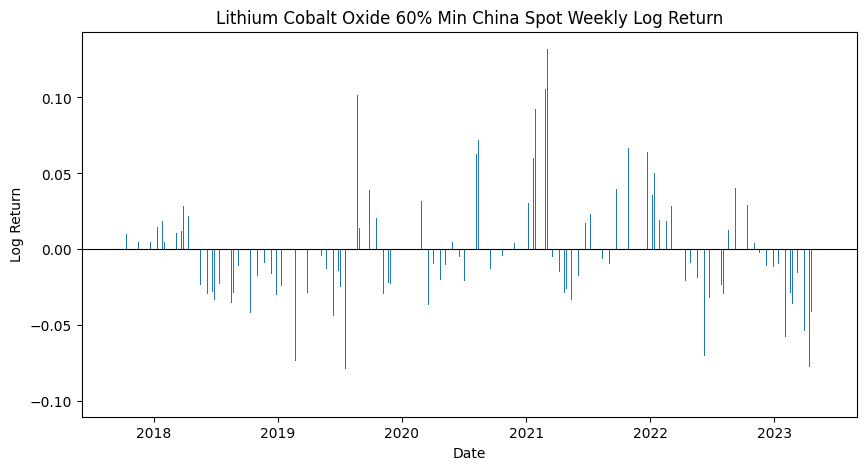

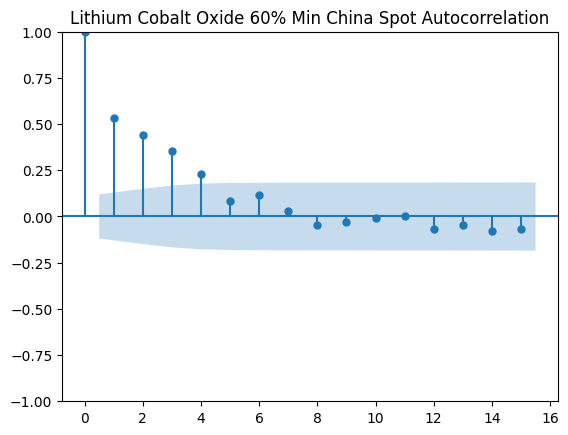

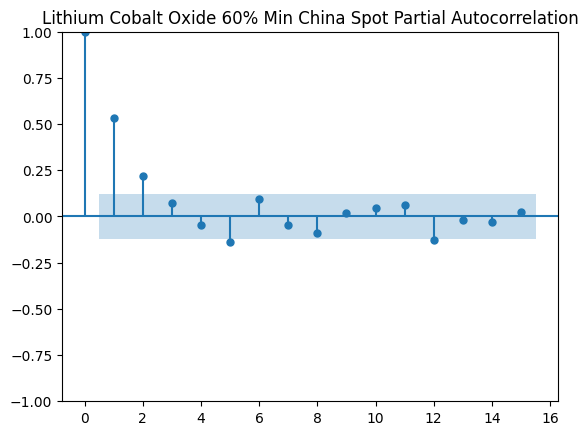

In [17]:
# Lithium Cobalt Oxide 60% Min China Spot

ltcx60 = pd.read_csv('./Data/60C-LTCX.csv', usecols=[0,1])
ltcx60.set_index('Date', inplace = True)
ltcx60.rename(columns = {'Close': 'Price'}, inplace = True)
ltcx60.index = pd.to_datetime(ltcx60.index)
ltcx60 = ltcx60.sort_index()
ltcx60['Price'] = ltcx60['Price'].apply(str_to_num)
ltcx60.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
ltcx60 = ltcx60[ltcx60.index.dayofweek == 4] # Friday
ltcx60 = ltcx60[ltcx60.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# ltcx60.to_csv('ltcx60.csv')
display(ltcx60)

ltcx60['log_ret'] = np.log(ltcx60.Price).diff() # Weekly log return
ltcx60 = ltcx60.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(ltcx60.index, ltcx60.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Lithium Cobalt Oxide 60% Min China Spot Weekly Log Return')
plt.show()

acf = plot_acf(ltcx60['log_ret'], lags=15, alpha=0.05, title='Lithium Cobalt Oxide 60% Min China Spot Autocorrelation')
pacf = plot_pacf(ltcx60['log_ret'], lags=15, alpha=0.05, method='ywm', title='Lithium Cobalt Oxide 60% Min China Spot Partial Autocorrelation')

99% Min China Lithium Metal Spot:
- File: 99MIN-LTMT.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/99-min-china-lithium-metal-futures-historical-data
- Currency: CNY
- Available times: sincd 2015-10-01

,Price
Date,
2017-09-08,815000.0
2017-09-15,815000.0
2017-09-22,815000.0
2017-09-29,815000.0
2017-10-13,830000.0
...,...
2023-04-21,2030000.0
2023-04-28,2030000.0
2023-05-05,2030000.0


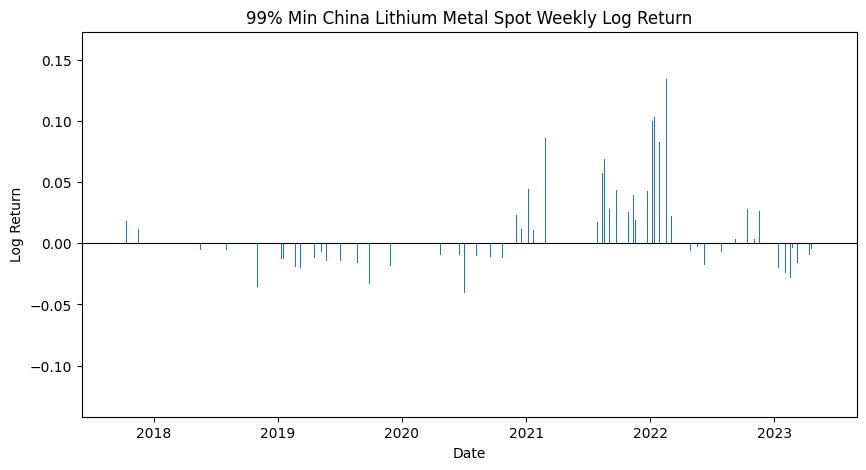

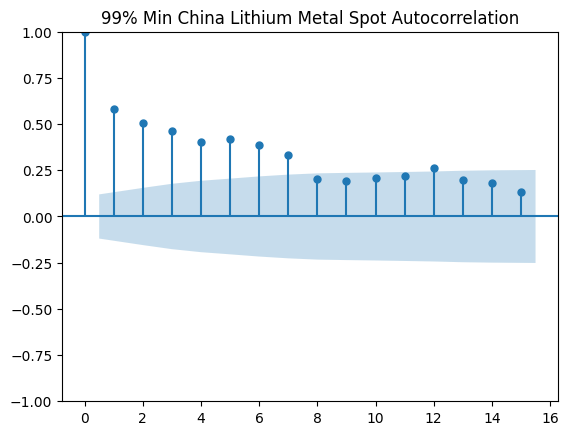

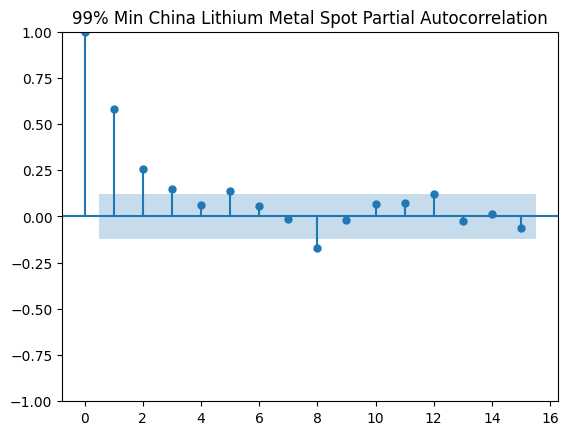

In [18]:
# 99% Min China Lithium Metal Spot

ltmt99 = pd.read_csv('./Data/99MIN-LTMT.csv', usecols=[0,1])
ltmt99.set_index('Date', inplace = True)
ltmt99.rename(columns = {'Close': 'Price'}, inplace = True)
ltmt99.index = pd.to_datetime(ltmt99.index)
ltmt99 = ltmt99.sort_index()
ltmt99['Price'] = ltmt99['Price'].apply(str_to_num)
ltmt99.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
ltmt99 = ltmt99[ltmt99.index.dayofweek == 4] # Friday
ltmt99 = ltmt99[ltmt99.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# ltmt99.to_csv('ltmt99.csv')
display(ltmt99)

ltmt99['log_ret'] = np.log(ltmt99.Price).diff() # Weekly log return
ltmt99 = ltmt99.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(ltmt99.index, ltmt99.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('99% Min China Lithium Metal Spot Weekly Log Return')
plt.show()

acf = plot_acf(ltmt99['log_ret'], lags=15, alpha=0.05, title='99% Min China Lithium Metal Spot Autocorrelation')
pacf = plot_pacf(ltmt99['log_ret'], lags=15, alpha=0.05, method='ywm', title='99% Min China Lithium Metal Spot Partial Autocorrelation')

99.9% Min China Lithium Metal Spot:
- File: 999MIN-LTMT.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/99.9-min-china-lithium-metal-futures-historical-data
- Currency: CNY
- Available times: since 2016-07-01

,Price
Date,
2017-09-08,885000.0
2017-09-15,885000.0
2017-09-22,885000.0
2017-09-29,885000.0
2017-10-13,905000.0
...,...
2023-04-21,2080000.0
2023-04-28,2080000.0
2023-05-05,2080000.0


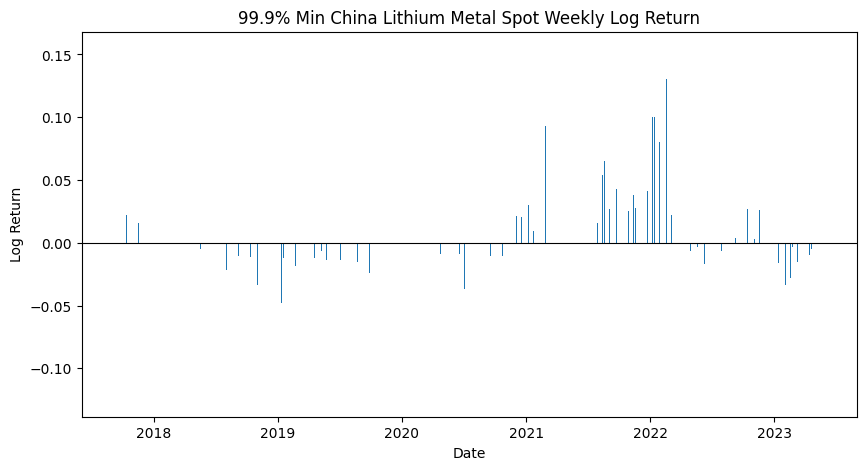

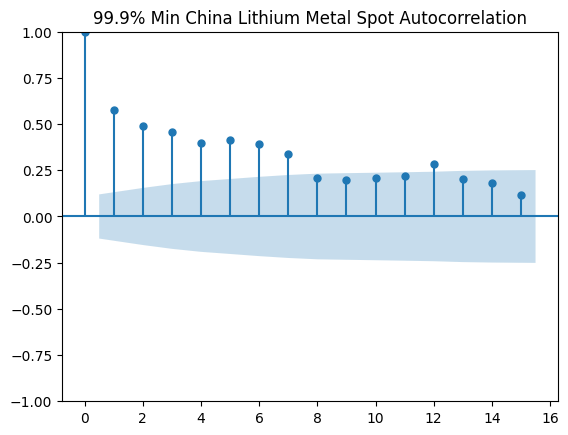

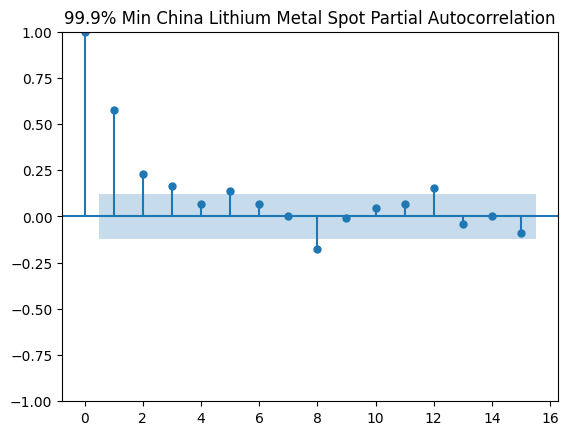

In [19]:
# 99.9% Min China Lithium Metal Spot

ltmt999 = pd.read_csv('./Data/999MIN-LTMT.csv', usecols=[0,1])
ltmt999.set_index('Date', inplace = True)
ltmt999.rename(columns = {'Close': 'Price'}, inplace = True)
ltmt999.index = pd.to_datetime(ltmt999.index)
ltmt999 = ltmt999.sort_index()
ltmt999['Price'] = ltmt999['Price'].apply(str_to_num)
ltmt999.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
ltmt999 = ltmt999[ltmt999.index.dayofweek == 4] # Friday
ltmt999 = ltmt999[ltmt999.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# ltmt999.to_csv('ltmt999.csv')
display(ltmt999)

ltmt999['log_ret'] = np.log(ltmt999.Price).diff() # Weekly log return
ltmt999 = ltmt999.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(ltmt999.index, ltmt999.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('99.9% Min China Lithium Metal Spot Weekly Log Return')
plt.show()

acf = plot_acf(ltmt999['log_ret'], lags=15, alpha=0.05, title='99.9% Min China Lithium Metal Spot Autocorrelation')
pacf = plot_pacf(ltmt999['log_ret'], lags=15, alpha=0.05, method='ywm', title='99.9% Min China Lithium Metal Spot Partial Autocorrelation')

Solactive Global Lithium (SOLLIT):
- File: SOLLIT.csv
- Source: Investing.com
- URL: https://www.investing.com/indices/solactive-global-lithium-historical-data
- Currency: USD
- Available times: 2010-07-01

,Price,log_ret
Date,,
2017-09-15,885000.0,0.000000
2017-09-22,885000.0,0.000000
2017-09-29,885000.0,0.000000
2017-10-13,905000.0,0.022347
2017-10-20,910000.0,0.005510
...,...,...
2023-04-21,2080000.0,-0.004796
2023-04-28,2080000.0,-0.004796
2023-05-05,2080000.0,-0.004796


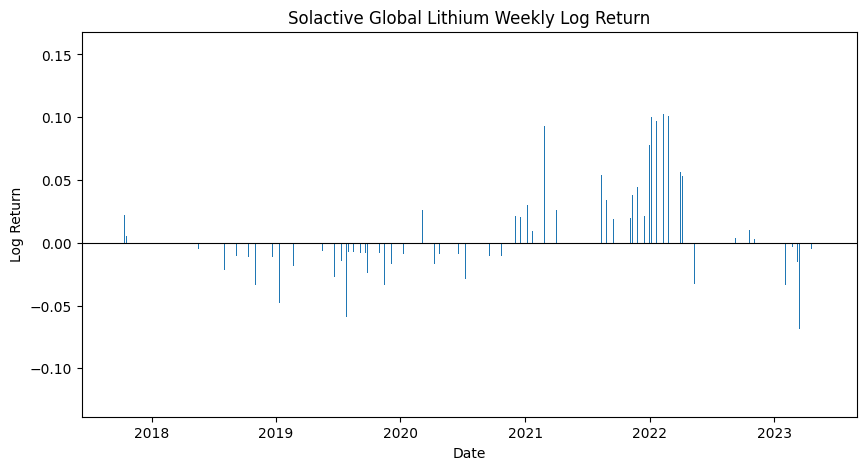

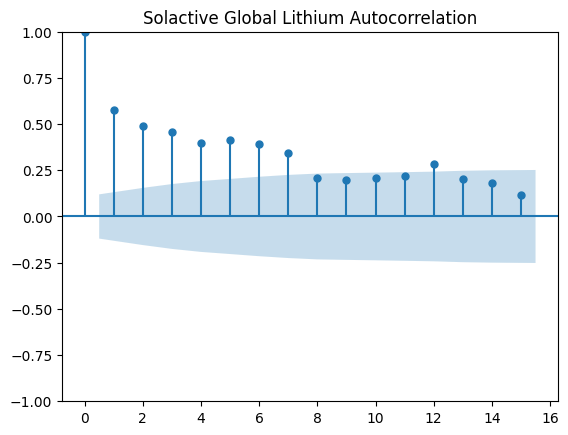

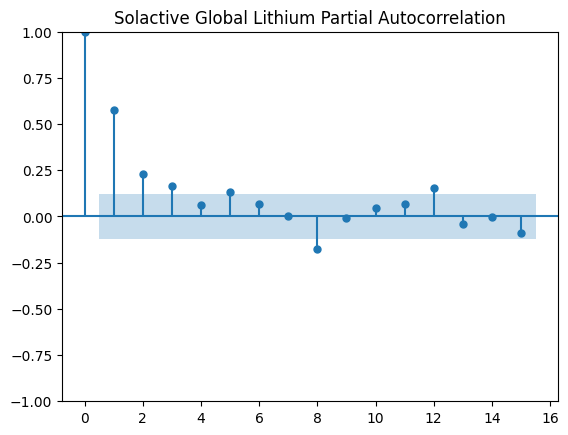

In [20]:
# Solactive Global Lithium

sollit = pd.read_csv('./Data/SOLLIT.csv', usecols=[0,1])
sollit.set_index('Date', inplace = True)
sollit.rename(columns = {'Close': 'Price'}, inplace = True)
sollit.index = pd.to_datetime(sollit.index)
sollit = ltmt999.sort_index()
sollit['Price'] = sollit['Price'].apply(str_to_num)
sollit.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
sollit = sollit[sollit.index.dayofweek == 4] # Friday
sollit = sollit[sollit.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

# sollit.to_csv('sollit.csv')
display(sollit)

sollit['log_ret'] = np.log(sollit.Price).diff() # Weekly log return
sollit = sollit.tail(-1) # Delete first row (log_ret = NaN)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(sollit.index, sollit.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Solactive Global Lithium Weekly Log Return')
plt.show()

acf = plot_acf(sollit['log_ret'], lags=15, alpha=0.05, title='Solactive Global Lithium Autocorrelation')
pacf = plot_pacf(sollit['log_ret'], lags=15, alpha=0.05, method='ywm', title='Solactive Global Lithium Partial Autocorrelation')